# Titanic - Machine Learning from Disaster

Great, working on a Titanic survival prediction project is a classic machine learning task that's excellent for learning. Here's a high-level approach to tackle your project:

1. **Understand the Data:** First, you should understand the features in your datasets. Common features in Titanic datasets include PassengerId, Pclass (ticket class), Name, Sex, Age, SibSp (siblings/spouses aboard), Parch (parents/children aboard), Ticket, Fare, Cabin, and Embarked (port of embarkation). The target variable is usually 'Survived', indicating whether the passenger survived (1) or not (0).

2. **Preprocess the Data:** Before feeding your data into a machine learning model, you need to clean and preprocess it. This could include handling missing values, converting categorical variables to numeric representations, normalizing/standardizing numerical features, and possibly creating new features from the existing ones.

3. **Split the Training Data:** Although you have separate train and test datasets, it's good practice to split your training data into training and validation sets. This way, you can validate your model's performance and avoid overfitting.

4. **Choose a Model:** For a binary classification problem like this, you have several model options. Common choices include logistic regression, decision trees, random forests, support vector machines, and neural networks. You might start with simpler models like logistic regression or decision trees and then try more complex models to compare performance.

5. **Train the Model:** Train your chosen model on the training data and tune it using the validation set. You might need to adjust hyperparameters and experiment with different preprocessing steps to improve accuracy.

6. **Evaluate the Model:** Use the validation set to evaluate your model's performance. Since your goal is to maximize accuracy, you can use this as your primary metric. However, it's also worth looking at other metrics like precision, recall, and the F1 score, especially if the dataset is imbalanced.

7. **Predict and Submit:** Once you're satisfied with your model's performance on the validation set, you can use it to make predictions on the test set. Then, format your predictions to meet the submission requirements (usually a CSV file with PassengerId and the predicted Survived values).

8. **Iterate:** Model development is an iterative process. You might go back and try different models, preprocessing steps, or feature engineering strategies based on your results.

In [1]:
###########################################
############# Packages Import #############
###########################################
# Dataframe manipulation
import pandas as pd
import polars as pl
import numpy as np

# Analysis and visualization
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt 
import seaborn as sns

# Scikit Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


# Remove the warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1 - **Understand the Data**

In [2]:
train_data = pd.read_csv('/Users/eduardoesteves/dev/kaggle/titanic/train.csv')
test_data = pd.read_csv('/Users/eduardoesteves/dev/kaggle/titanic/test.csv')

In [3]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data['Cabin']. nunique()

147

## Step 2 - **Preprocess the Data**

In [6]:
# Handling categorical data: Convert 'Sex' and 'Embarked' into numerical values
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])

# Handling missing values: You might fill missing 'Age' and 'Fare' values with their medians or means
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)

## Step 3 - **Split the Training Data**

In [7]:
# Selecting basic features
X = train_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)  # Features: all columns except 'Survived'

y = train_data['Survived']  # Target variable: 'Survived'

# Split the data - 80% for training, 20% for validation
# You can adjust the test_size to change the split ratio
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4 - **Choose a Model**

Here's how each metric provides different insights into your model's performance:

1. **Accuracy**: This measures the overall correctness of the model - the proportion of true results (both true positives and true negatives) among the total number of cases examined. While it's intuitive and widely used, accuracy might not be the best metric if your data set is imbalanced (i.e., a significant discrepancy between the number of survivors and non-survivors).

2. **Precision**: Precision indicates the proportion of positive identifications that were actually correct. In the Titanic context, it reflects the percentage of passengers labeled as survivors by the model who actually survived. High precision means that the model has a low false positive rate, which is crucial if the cost of false positives is high.

3. **Recall**: Recall measures the proportion of actual positives that were identified correctly. For the Titanic, it shows what fraction of the actual survivors were predicted to survive by the model. High recall is important when the cost of false negatives is high.

4. **F1 Score**: The F1 score is the harmonic mean of precision and recall, providing a single metric that balances the two. It's particularly useful when you need a balance between precision and recall and when dealing with imbalanced classes.

5. **ROC-AUC Score**: The ROC curve plots the true positive rate (recall) against the false positive rate at various threshold settings. The AUC (Area Under the Curve) provides a single measure of the model's performance across all thresholds. A model that predicts at chance level will have a ROC-AUC of 0.5, while a perfect model will have a ROC-AUC of 1.0.


In [8]:
# It's often a good idea to scale your data for models like SVM and KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the models to train
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}

# Dictionary to hold the evaluation metrics for each model
model_metrics = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    if name in ['SVM', 'KNN']:  # These models benefit from scaled features
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)
        y_pred_proba = model.predict_proba(X_val_scaled)[:, 1]  # Probability for ROC-AUC
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_pred_proba = model.predict_proba(X_val)[:, 1]  # Probability for ROC-AUC

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)

    # Store metrics for each model
    model_metrics[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
    }

# Display the metrics for each model
for name, metrics in model_metrics.items():
    print(f"{name} Performance:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print()

Logistic Regression Performance:
  accuracy: 0.7877094972067039
  precision: 0.7647058823529411
  recall: 0.7027027027027027
  f1: 0.7323943661971831
  roc_auc: 0.857915057915058

Decision Tree Performance:
  accuracy: 0.7653631284916201
  precision: 0.7222222222222222
  recall: 0.7027027027027027
  f1: 0.7123287671232876
  roc_auc: 0.7561132561132561

Random Forest Performance:
  accuracy: 0.8268156424581006
  precision: 0.8028169014084507
  recall: 0.7702702702702703
  f1: 0.7862068965517242
  roc_auc: 0.8990347490347491

Gradient Boosting Performance:
  accuracy: 0.8156424581005587
  precision: 0.8059701492537313
  recall: 0.7297297297297297
  f1: 0.7659574468085106
  roc_auc: 0.874066924066924

SVM Performance:
  accuracy: 0.8044692737430168
  precision: 0.8095238095238095
  recall: 0.6891891891891891
  f1: 0.7445255474452555
  roc_auc: 0.8579150579150578

KNN Performance:
  accuracy: 0.7988826815642458
  precision: 0.7714285714285715
  recall: 0.7297297297297297
  f1: 0.75
  roc_a

When selecting the best model, consider the following:

- **Accuracy**: Choose a model with high accuracy if the costs of false positives and false negatives are roughly equivalent, and the class distribution is balanced.

- **Precision and Recall**: If the cost of false positives is high (e.g., wrongly predicting that a passenger survived), prioritize precision. If the cost of false negatives is more critical (e.g., failing to identify a survivor), prioritize recall.

- **F1 Score**: When you need a balance between precision and recall, choose the model with the highest F1 score.

- **ROC-AUC**: When you want a model that performs well across various decision thresholds, or when dealing with imbalanced classes, look for a model with a high ROC-AUC score.

In summary, the "best" model depends on the specific requirements and trade-offs of your task. Visualizing these metrics can help you make a more informed and nuanced decision based on those requirements.

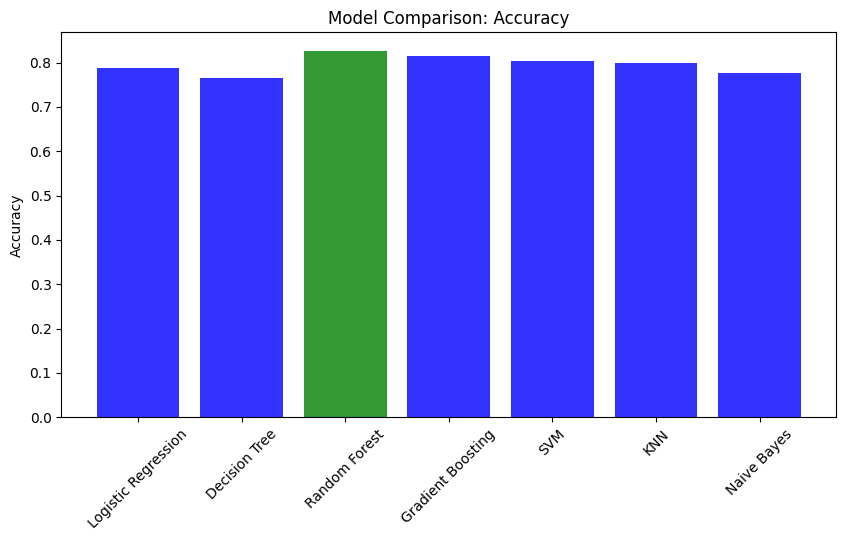

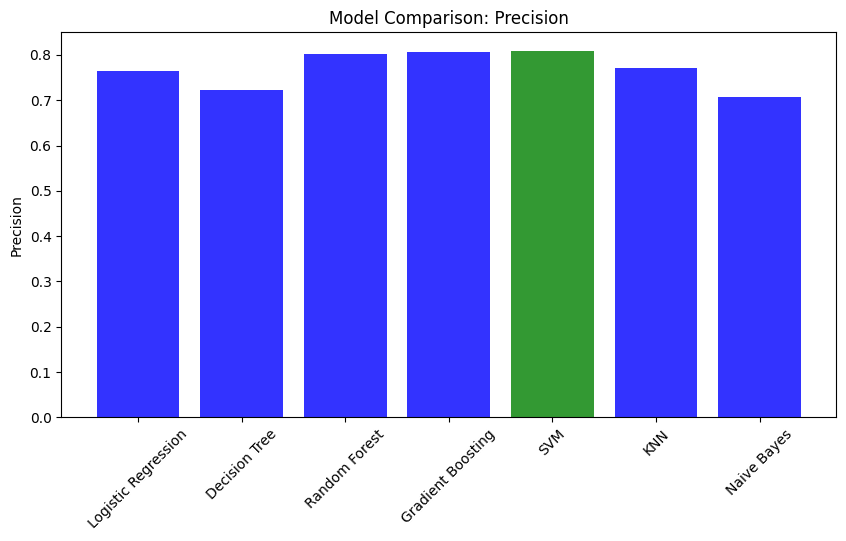

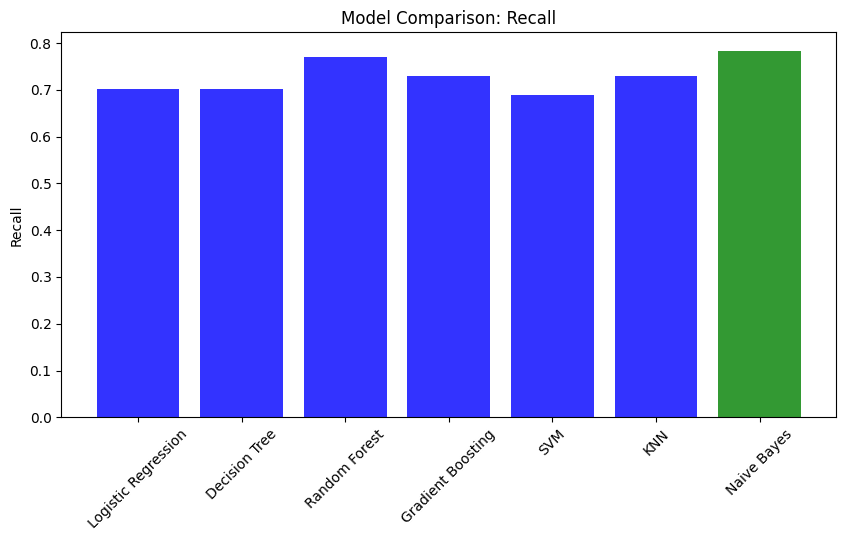

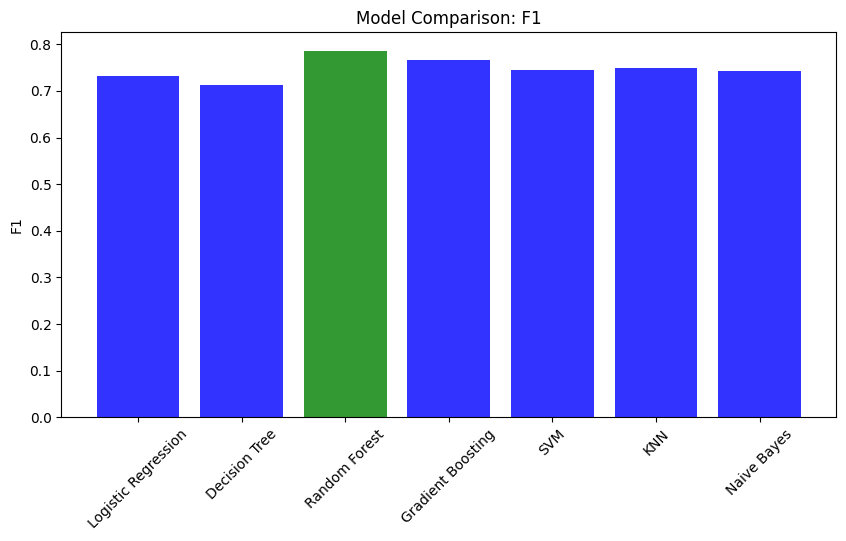

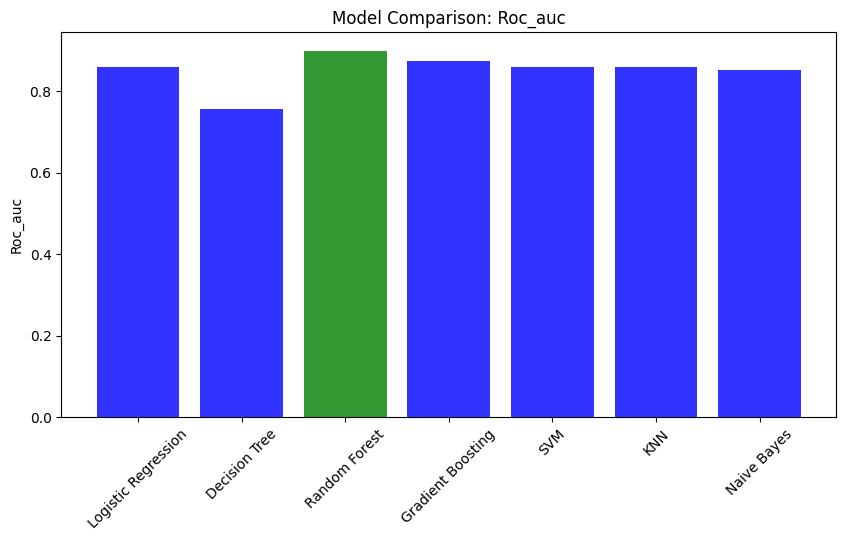

In [9]:
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
index = range(len(models))
model_names = list(models.keys())

for metric in metrics:
    values = [model_metrics[model][metric] for model in models]
    
    # Find the index of the maximum value for highlighting
    max_value_index = values.index(max(values))
    
    plt.figure(figsize=(10, 5))
    
    # Iterate over each model to plot
    for i in range(len(values)):
        if i == max_value_index:
            # Highlight the bar with the maximum value
            plt.bar(i, values[i], alpha=0.8, color='green')
        else:
            plt.bar(i, values[i], alpha=0.8, color='blue')
    
    plt.title(f'Model Comparison: {metric.capitalize()}')
    plt.xticks(index, model_names, rotation=45)
    plt.ylabel(metric.capitalize())
    plt.show()

In [10]:
model_metrics = pd.DataFrame.from_dict(model_metrics)
model_metrics.to_csv('model_metrics.csv', index=False)

## Step 6: **Train the Model**

### Hyperparameter tuning -> Identify the best parameters

#### Grid Search

In [11]:
# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)

# You can then use these parameters to initialize a new model
best_grid_model = grid_search.best_estimator_

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1

#### Random Search

In [12]:
# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt']
}

# Instantiate the random search model
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", random_search.best_params_)

# You can then use these parameters to initialize a new model
best_random_model = random_search.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2,

### Evaluate both models:

In [13]:
# Predictions on the validation set
y_pred_grid = best_grid_model.predict(X_val)
y_pred_proba_grid = best_grid_model.predict_proba(X_val)[:, 1]  # Probabilities for ROC-AUC

y_pred_random = best_random_model.predict(X_val)
y_pred_proba_random = best_random_model.predict_proba(X_val)[:, 1]  # Probabilities for ROC-AUC

# Initialize dictionaries to store the metrics
metrics_grid = {}
metrics_random = {}

# Calculate metrics for the Grid Search model
metrics_grid['accuracy'] = accuracy_score(y_val, y_pred_grid)
metrics_grid['precision'] = precision_score(y_val, y_pred_grid)
metrics_grid['recall'] = recall_score(y_val, y_pred_grid)
metrics_grid['f1'] = f1_score(y_val, y_pred_grid)
metrics_grid['roc_auc'] = roc_auc_score(y_val, y_pred_proba_grid)
metrics_grid['confusion_matrix'] = confusion_matrix(y_val, y_pred_grid)

# Calculate metrics for the Random Search model
metrics_random['accuracy'] = accuracy_score(y_val, y_pred_random)
metrics_random['precision'] = precision_score(y_val, y_pred_random)
metrics_random['recall'] = recall_score(y_val, y_pred_random)
metrics_random['f1'] = f1_score(y_val, y_pred_random)
metrics_random['roc_auc'] = roc_auc_score(y_val, y_pred_proba_random)
metrics_random['confusion_matrix'] = confusion_matrix(y_val, y_pred_random)

# Output the metrics for comparison
print("Grid Search Model Metrics:")
for metric, value in metrics_grid.items():
    if metric != 'confusion_matrix':
        print(f"{metric}: {value}")
    else:
        print(f"{metric}:\n{value}\n")

print("Random Search Model Metrics:")
for metric, value in metrics_random.items():
    if metric != 'confusion_matrix':
        print(f"{metric}: {value}")
    else:
        print(f"{metric}:\n{value}\n")

Grid Search Model Metrics:
accuracy: 0.8268156424581006
precision: 0.8307692307692308
recall: 0.7297297297297297
f1: 0.7769784172661871
roc_auc: 0.8907335907335908
confusion_matrix:
[[94 11]
 [20 54]]

Random Search Model Metrics:
accuracy: 0.8100558659217877
precision: 0.8225806451612904
recall: 0.6891891891891891
f1: 0.75
roc_auc: 0.8911196911196912
confusion_matrix:
[[94 11]
 [23 51]]



### Random Forest Classifier Model hyperparameter tuning
Tweaking the parameters of a Random Forest Classifier involves understanding what each parameter does and how it can impact the model's performance. Here's a guide to some key parameters you might consider adjusting:

1. **`n_estimators`**: This parameter specifies the number of trees in the forest. Generally, more trees increase the model's performance and robustness but also increase computational cost. You might start with a default value of 100 and experiment with higher values to see if performance improves.

2. **`max_depth`**: This controls the maximum depth of each tree. Deeper trees can model more complex patterns but might lead to overfitting. You can try different values or leave it unspecified, which allows the trees to expand until all leaves are pure or until they contain less than `min_samples_split` samples.

3. **`min_samples_split`**: This determines the minimum number of samples required to split an internal node. Higher values prevent the model from learning too specific patterns, which can be beneficial for generalization but might lead to underfitting if set too high.

4. **`min_samples_leaf`**: The minimum number of samples required to be at a leaf node. Setting this parameter can provide a similar effect to `min_samples_split`, ensuring that each leaf has a sufficient number of samples, which can help smooth the model, especially in regression.

5. **`max_features`**: The number of features to consider when looking for the best split. The default is the square root of the number of features, which generally works well, but you can experiment with other values or set it to 'auto', which will consider all features at each split.

6. **`bootstrap`**: This boolean parameter indicates whether or not to use bootstrap samples when building trees. The default is `True`, which generally provides a better model. Setting it to `False` will use the entire dataset to build each tree.

7. **`oob_score`**: Sometimes, especially with smaller datasets, it's useful to utilize out-of-bag samples to estimate the generalization accuracy. This is only available if `bootstrap=True`.

In [14]:
# Train the Random Forest model
# Start with default parameters or choose your baseline based on domain knowledge or previous experiments
rf_model = RandomForestClassifier(random_state=42)

# Set of parameters to test
rf_model = RandomForestClassifier(
    n_estimators=150,  # More trees (default is 100)
    max_depth=15,  # Maximum depth of each tree
    min_samples_split=5,  # Minimum number of samples required to split an internal node
    min_samples_leaf=2,  # Minimum number of samples required to be at a leaf node
    max_features='sqrt',  # Number of features to consider at each split
    bootstrap=True,  # Use bootstrap samples
    oob_score=True,  # Use out-of-bag samples to estimate the R^2 on unseen data
    random_state=42  # Ensuring a consistent result for reproducibility
)

# Training the model
rf_model.fit(X_train, y_train)
# Now your model is trained and ready to make predictions or be evaluated on a separate test set

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=150, oob_score=True, random_state=42)

Here's how you can evaluate your Random Forest model on the validation data:

1. **Make Predictions**: Use your trained model to predict outcomes on the validation feature set (`X_val`).

2. **Evaluate Performance**: Compare the predictions against the actual outcomes (`y_val`) to calculate various performance metrics.

In [15]:
# Make predictions on the validation set
y_pred = rf_model.predict(X_val)
y_pred_proba = rf_model.predict_proba(X_val)[:, 1]  # Probability predictions for ROC-AUC

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

# Print the performance metrics
print(f"Validation Accuracy: {accuracy}")
print(f"Validation Precision: {precision}")
print(f"Validation Recall: {recall}")
print(f"Validation F1 Score: {f1}")
print(f"Validation ROC-AUC: {roc_auc}")

# # Optional: Display the confusion matrix
cm = confusion_matrix(y_val, y_pred)
print(f"Confusion Matrix:\n{cm}")


Validation Accuracy: 0.8268156424581006
Validation Precision: 0.8208955223880597
Validation Recall: 0.7432432432432432
Validation F1 Score: 0.7801418439716312
Validation ROC-AUC: 0.8987129987129988
Confusion Matrix:
[[93 12]
 [19 55]]


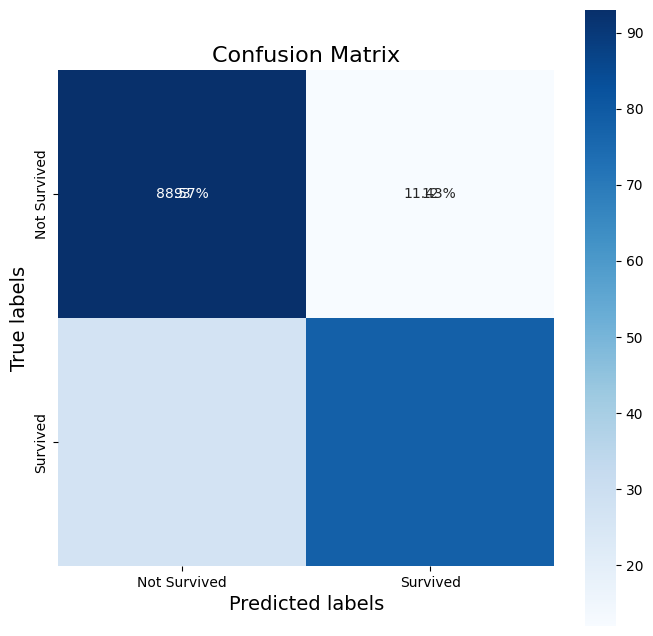

In [16]:
# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Calculate the percentage of each cell relative to the total number of observations
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(8, 8))

# Plot the confusion matrix with annotations
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, square=True)

# Optionally, add a secondary heatmap to show percentages
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='Blues', ax=ax, mask=cm == 0, cbar=False, square=True)

# Labels, title and ticks
label_font = {'size':'14'}
ax.set_xlabel('Predicted labels', fontdict=label_font)
ax.set_ylabel('True labels', fontdict=label_font)
ax.set_title('Confusion Matrix', fontdict={'size':'16'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.xaxis.set_ticklabels(['Not Survived', 'Survived'])
ax.yaxis.set_ticklabels(['Not Survived', 'Survived'])

plt.show()

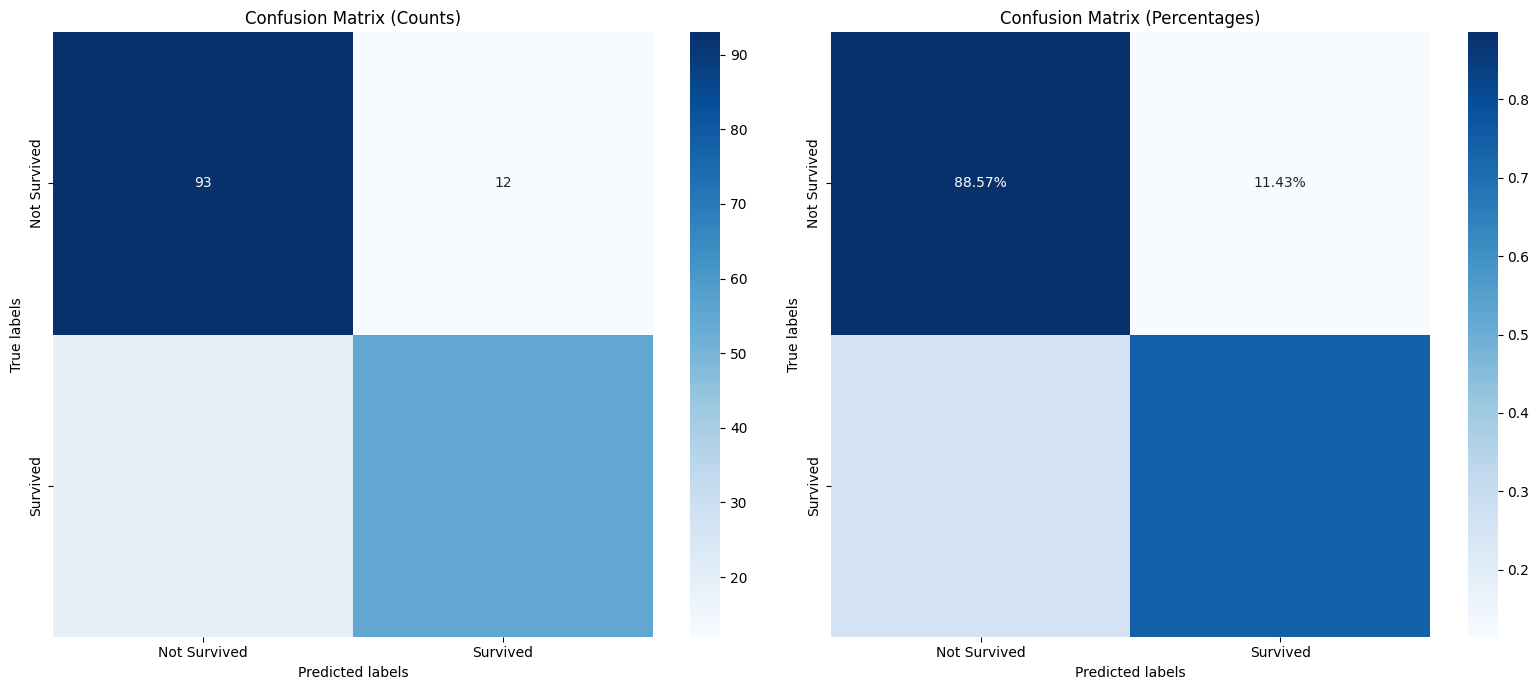

In [17]:
# Set up the matplotlib figure, creating two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot the confusion matrix with raw numbers
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix (Counts)')
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.xaxis.set_ticklabels(['Not Survived', 'Survived'])
ax1.yaxis.set_ticklabels(['Not Survived', 'Survived'])

# Plot the confusion matrix with percentages
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='Blues', ax=ax2)
ax2.set_title('Confusion Matrix (Percentages)')
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.xaxis.set_ticklabels(['Not Survived', 'Survived'])
ax2.yaxis.set_ticklabels(['Not Survived', 'Survived'])

plt.tight_layout()
plt.show()

## Step 7: **Predict and Submit**

In [18]:
# Prepare the Test data

# Handling categorical data: Convert 'Sex' and 'Embarked' into numerical values
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'])

# Handling missing values: You might fill missing 'Age' and 'Fare' values with their medians or means
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

test_data = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)  # Features: columns except 'Name', 'Ticket' and 'Cabin'

In [19]:
# Make predictions on the test set
test_predictions = rf_model.predict(test_data)

# Create a DataFrame for submission
# Usually, you need PassengerId to identify the passengers
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

# Save the submission file
submission_file = 'submission.csv'
submission.to_csv(submission_file, index=False)

submission_file  # Output the path to the submission file for downloading


'submission.csv'